                          Handwritten digits classification using neural network                                        
In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [1]:
import tensorflow as tf
from tensorflow import keras
# import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
#To scale 0 to 1 by divide 255
X_train = X_train / 255
X_test = X_test / 255

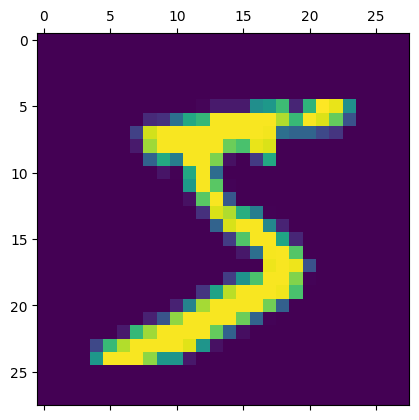

In [8]:
plt.matshow(X_train[0])

In [9]:
y_train[0]

5

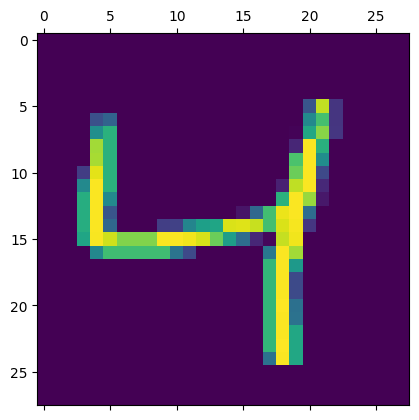

In [10]:
plt.matshow(X_train[2])

In [11]:
y_train[2]

4

In [12]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [13]:
X_train.shape

(60000, 28, 28)

In [14]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)


In [15]:
X_train_flattened.shape

(60000, 784)

In [16]:
X_test_flattened.shape

(10000, 784)

Very simple neural network with no hidden layers

<img src='digits_nn.jpg'/>

In [17]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)



Epoch 1/5


1875/1875 [==============================] - 8s 3ms/step - loss: 0.4702 - accuracy: 0.8764
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3034 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2833 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2728 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2665 - accuracy: 0.9256


In [18]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2680 - accuracy: 0.9264


[0.2679760456085205, 0.9264000058174133]

In [19]:
model.predict(X_test_flattened)

313/313 [==============================] - 1s 3ms/step


array([[2.05126610e-02, 4.06556410e-07, 6.66836500e-02, ...,
        9.99819040e-01, 8.37902799e-02, 6.43679917e-01],
       [5.01586318e-01, 7.30966032e-03, 9.99358594e-01, ...,
        1.31553817e-12, 2.63054371e-01, 3.56436458e-09],
       [3.93833849e-04, 9.92231965e-01, 6.81498468e-01, ...,
        1.52457967e-01, 3.69518846e-01, 4.35094647e-02],
       ...,
       [3.26645045e-06, 4.58786872e-06, 1.21967541e-03, ...,
        2.07322448e-01, 4.97140378e-01, 6.97116673e-01],
       [1.57700255e-04, 2.16356464e-04, 1.36616494e-04, ...,
        4.90006569e-05, 6.50858462e-01, 1.10744790e-04],
       [9.25890636e-03, 5.63572966e-10, 1.96253598e-01, ...,
        1.27005615e-08, 3.10000498e-04, 6.35452125e-07]], dtype=float32)

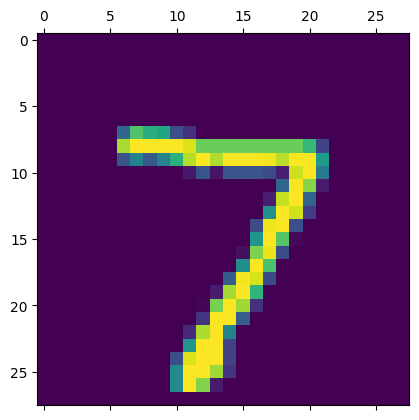

In [20]:
plt.matshow(X_test[0])

In [21]:
y_pred = model.predict(X_test_flattened)
y_pred[0]

313/313 [==============================] - 1s 3ms/step


array([2.0512661e-02, 4.0655641e-07, 6.6683650e-02, 9.4176000e-01,
       2.5421255e-03, 8.1909090e-02, 1.7301946e-06, 9.9981904e-01,
       8.3790280e-02, 6.4367992e-01], dtype=float32)

In [22]:
np.argmax(y_pred[0])

7

In [23]:
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels[:5]

[7, 2, 1, 0, 4]

In [24]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [25]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    1,    2,    0,    4,    6,    2,    1,    0],
       [   0, 1112,    4,    1,    0,    1,    4,    2,   11,    0],
       [   6,    9,  933,    9,    7,    3,   13,   10,   37,    5],
       [   4,    0,   25,  902,    2,   28,    3,   10,   26,   10],
       [   1,    1,    7,    0,  912,    0,   10,    4,   10,   37],
       [  10,    2,    1,   23,    8,  777,   17,    7,   39,    8],
       [  12,    3,    6,    1,    7,    8,  916,    2,    3,    0],
       [   1,    6,   27,    4,    7,    0,    0,  944,    3,   36],
       [   7,    7,    7,   12,    9,   20,    9,   12,  882,    9],
       [  11,    7,    1,    7,   25,    5,    0,   22,    9,  922]])>

Text(95.72222222222221, 0.5, 'Truth')

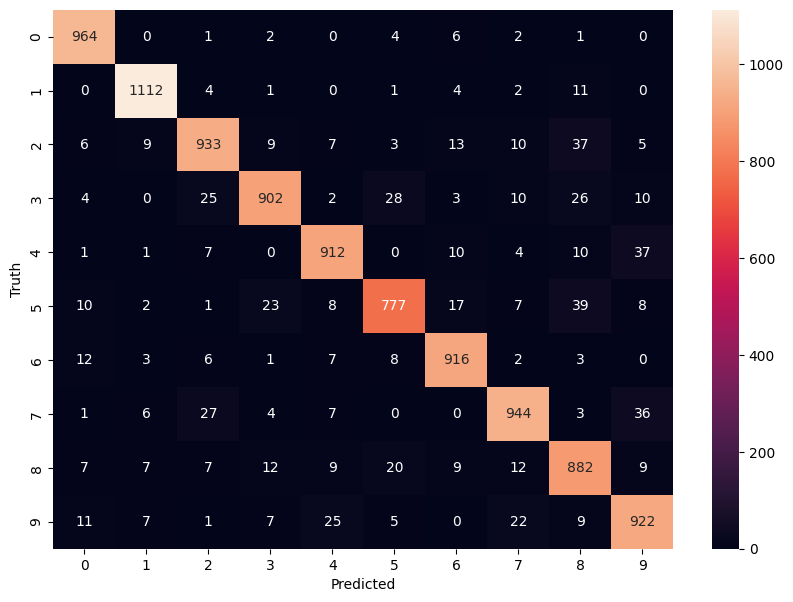

In [26]:
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Using hidden layer


In [27]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 10s 4ms/step - loss: 0.2748 - accuracy: 0.9214
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1211 - accuracy: 0.9640
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0846 - accuracy: 0.9747
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0644 - accuracy: 0.9807
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0503 - accuracy: 0.9849


313/313 [==============================] - 1s 3ms/step


Text(95.72222222222221, 0.5, 'Truth')

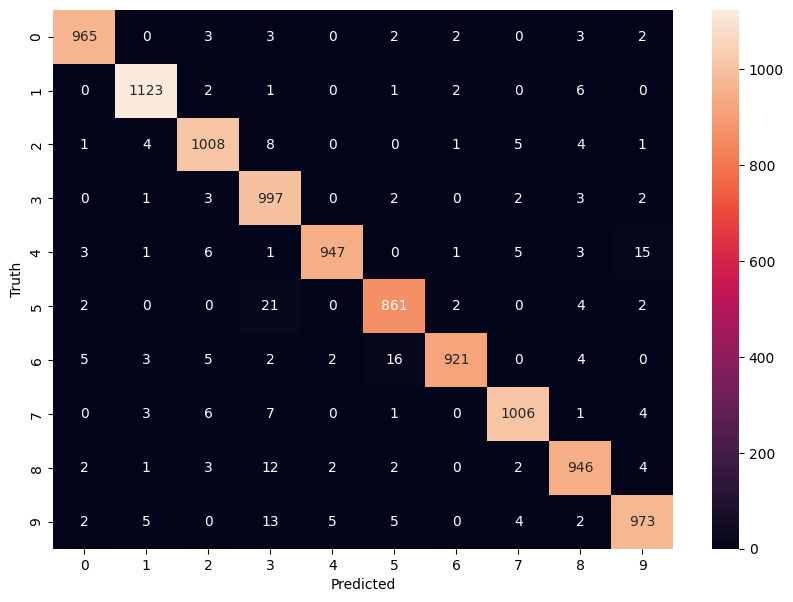

In [28]:
y_pred = model.predict(X_test_flattened)
y_pred_labels = [np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Using Flatten layer so that we don't have to call .reshape on input dataset

In [29]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2721 - accuracy: 0.9229
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1238 - accuracy: 0.9636
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0865 - accuracy: 0.9746
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0659 - accuracy: 0.9803
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0527 - accuracy: 0.9836
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0416 - accuracy: 0.9873
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0335 - accuracy: 0.9899
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0267 - accuracy: 0.9921
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0230 - accuracy: 0.9931
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.01